<a href="https://colab.research.google.com/github/MarrtinJ/fantasy-bball-opt/blob/main/visualizeExperiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This file defines a function visualize() that uses matplotlib to visualize experiments

# Installing/Importing Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

import seaborn as sns

from datetime import datetime

In [ ]:
# stop the pandas indexing/splicing warning from appearing
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('dataset2.csv')
df2 = pd.read_csv('dataset2_splitpositions.csv')
# df = df[['Date', 'Name', 'Team', 'Position', 'Salary', 'FPTS']]
# df = df[df.FPTS >= 0] # drop all players who scored less than 0 points
df.shape, df2.shape

((43482, 27), (155418, 27))

In [ ]:
# all the unique dates in the dataset
dates = df['Date'].unique()

# DFS Setup / Helper Functions

In [ ]:
# used to create a dataset where the players who played multiple positions are split
# one datapoint per player per position
def splitPositions(df1):
  currentPlayers = None
  
  Utils = df1.copy()
  Utils['Position'] = 'UTIL'
  
  onePosition = df1[ df1['Position'].str.contains('/')==False ]
  print(onePosition.shape)

  multPositions = df[df['Position'].str.contains("/")]
  print(multPositions.shape)
  multPositions.reset_index(inplace=True, drop=True)

  pos1 = []
  pos2 = []
  for index, row in multPositions.iterrows():
    # print(index)
    playerPos1, playerPos2 = row['Position'].split('/')
    copy1 = row.copy()
    copy1['Position'] = playerPos1
    copy2 = row.copy()
    copy2['Position'] = playerPos2
    
    pos1.append(copy1)
    pos2.append(copy2)
    # print(playerPos1, playerPos2)

  pos1 = pd.DataFrame(pos1)
  pos2 = pd.DataFrame(pos2)
  
  currentPlayers = pd.concat([onePosition, pos1, pos2], ignore_index=True)
  currentPlayers.sort_values(['Date', 'Name', 'Team', 'Position'], na_position='first', inplace=True, ignore_index=True)

  Gs = currentPlayers[currentPlayers['Position'].isin(['PG', 'SG'])]
  Gs.drop_duplicates(subset=['Date', 'Name'], inplace=True)
  Gs['Position'] = 'G'

  Fs = currentPlayers[currentPlayers['Position'].isin(['SF', 'PF'])]
  Fs.drop_duplicates(subset=['Date', 'Name'], inplace=True)
  Fs['Position'] = 'F'

  currentPlayers = pd.concat([currentPlayers, Gs, Fs, Utils], ignore_index=True)
  currentPlayers.sort_values(['Date', 'Name', 'Team', 'Position'], na_position='first', inplace=True, ignore_index=True)

  return currentPlayers

In [ ]:
# returns a list of dataframes for each position
def buildPositionDFs(df1):
  # incr determines if the players are each position are sorted by increasing salary
  incr = [True, False]

  PGs = df1[df1['Position'] == 'PG']
  PGs.sort_values(by=['Salary', 'FPTS'], ascending=incr, inplace=True)
  PGs.reset_index(inplace=True, drop=True)

  SGs = df1[df1['Position'] == 'SG']
  SGs.sort_values(by=['Salary', 'FPTS'], ascending=incr, inplace=True)
  SGs.reset_index(inplace=True, drop=True)

  SFs = df1[df1['Position'] == 'SF']
  SFs.sort_values(by=['Salary', 'FPTS'], ascending=incr, inplace=True)
  SFs.reset_index(inplace=True, drop=True)

  PFs = df1[df1['Position'] == 'PF']
  PFs.sort_values(by=['Salary', 'FPTS'], ascending=incr, inplace=True)
  PFs.reset_index(inplace=True, drop=True)

  Cs = df1[df1['Position'] == 'C']
  Cs.sort_values(by=['Salary', 'FPTS'], ascending=incr, inplace=True)
  Cs.reset_index(inplace=True, drop=True)

  Gs = df1[df1['Position'] == 'G']
  Gs.sort_values(by=['Salary', 'FPTS'], ascending=incr, inplace=True)
  Gs.reset_index(inplace=True, drop=True)

  Fs = df1[df1['Position'] == 'F']
  Fs.sort_values(by=['Salary', 'FPTS'], ascending=incr, inplace=True)
  Fs.reset_index(inplace=True, drop=True)

  Utils = df1[df1['Position'] == 'UTIL']
  Utils.sort_values(by=['Salary', 'FPTS'], ascending=incr, inplace=True)
  Utils.reset_index(inplace=True, drop=True)

  return [PGs, SGs, SFs, PFs, Cs, Gs, Fs, Utils]
  # return [PGs, SGs, SFs, PFs, Cs]

# Test

In [ ]:
l1 = buildPositionDFs(df2)

In [ ]:
for i in range(len(l1)):
  print(l1[i].shape)

(12688, 27)
(15057, 27)
(15019, 27)
(13400, 27)
(11930, 27)


,Date,Name,Team,Starter,Position,Salary,FPTS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,+-
0,20191022,LeBron James,LAL,1,PG/SF,9900,43.25,36.00,7,19,...,1,9,10,8,1,1,5,3,18,-8
1,20191022,Jrue Holiday,Nor,1,PG/SG,7900,29.00,41.05,6,15,...,2,2,4,6,0,2,5,2,13,-14
2,20191022,Patrick Beverley,LAC,1,PG,5000,24.50,31.22,1,7,...,2,8,10,6,0,1,2,4,2,13
3,20191022,Lonzo Ball,Nor,1,PG,5400,22.25,24.50,2,7,...,0,5,5,5,0,0,1,2,8,-7
4,20191022,Nickeil Alexander-Walker,Nor,0,PG/SG,3400,15.00,11.55,1,10,...,1,3,4,2,2,0,1,2,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43477,20210701,John Collins,Atl,1,PF/C,6700,35.00,34.08,7,16,...,3,5,8,3,0,0,0,3,19,-16
43478,20210701,Clint Capela,Atl,1,C,6300,23.00,21.08,2,3,...,4,4,8,1,0,3,1,2,6,-11
43479,20210701,Onyeka Okongwu,Atl,0,C,3000,13.50,15.58,2,3,...,4,2,6,0,0,0,0,1,6,4
43480,20210701,Bruno Fernando,Atl,0,C,3000,0.00,0.52,0,0,...,0,0,0,0,0,0,0,0,0,2


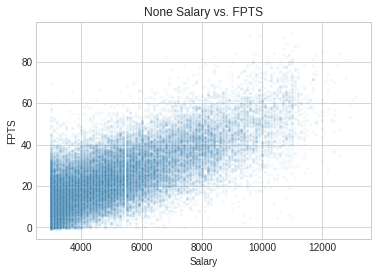

In [ ]:
# visualize(df, 'Salary', 'FPTS')
visualize(df, 'Salary', 'FPTS')


Filtering down to positions: ['UTIL']
After filtering positions: (43482, 27)


,Date,Name,Team,Starter,Position,Salary,FPTS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,+-
3,20191022,Anthony Davis,LAL,1,UTIL,10200,51.00,37.22,8,21,...,3,6,9,5,1,2,3,3,25,3
7,20191022,Avery Bradley,LAL,1,UTIL,4100,11.75,24.02,3,7,...,0,3,3,0,0,0,2,3,8,-1
11,20191022,Brandon Ingram,Nor,1,UTIL,5800,41.75,35.06,8,19,...,0,5,5,5,1,2,2,4,22,-19
16,20191022,Danny Green,LAL,1,UTIL,5300,46.25,32.20,10,14,...,1,6,7,0,2,1,0,3,28,7
20,20191022,Derrick Favors,Nor,1,UTIL,5600,19.25,20.46,3,6,...,1,6,7,2,0,1,1,5,6,-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155402,20210701,PJ Tucker,Mil,1,UTIL,3900,21.75,37.40,2,5,...,2,9,11,1,1,0,2,3,5,14
155407,20210701,Pat Connaughton,Mil,0,UTIL,3800,12.75,21.08,3,7,...,0,1,1,0,1,0,0,4,9,-2
155410,20210701,Skylar Mays,Atl,0,UTIL,3000,2.00,0.52,1,1,...,0,0,0,0,0,0,0,0,2,2
155414,20210701,Solomon Hill,Atl,0,UTIL,3000,0.00,1.05,0,1,...,0,0,0,0,0,0,0,0,0,2


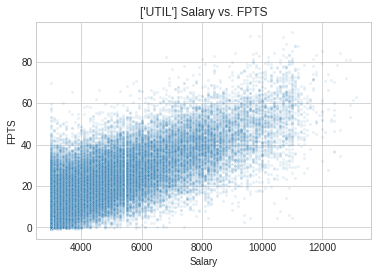

In [ ]:
# visualize(df, 'asdf', 'asdf', dates)
# visualize(df2, 'x', 'y', dates=dates, positions=['PF', 'C'], players=['Anthony Davis'])
visualize(df2, 'Salary', 'FPTS', positions=['UTIL'])

Filtering down to positions: ['PG']
After filtering positions: (12688, 27)
Filtering down to positions: ['SG']
After filtering positions: (15057, 27)
Filtering down to positions: ['SF']
After filtering positions: (15019, 27)
Filtering down to positions: ['PF']
After filtering positions: (13400, 27)
Filtering down to positions: ['C']
After filtering positions: (11930, 27)


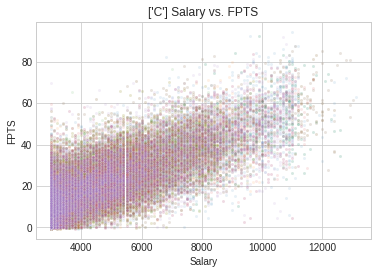

In [ ]:
# pos_arr = ['PG', 'SG', 'SF', 'PF', 'C']
pos_arr = ['PG', 'SG', 'SF', 'PF', 'C', 'G', 'F', 'UTIL']

for i in range(len(l1)):
  pos = pos_arr[i]
  visualize(df2, 'Salary', 'FPTS', positions=[pos])


In [ ]:
def visualize(df, x, y, dates=None, positions=None, players=None, output=False):
  if dates is not None:
    print(f'Filtering down to dates: {dates}')
    df = df[df['Date'].isin(dates)]
    print(f'After filtering dates: {df.shape}')
  
  if positions is not None:
    print(f'Filtering down to positions: {positions}')
    df = df[df['Position'].isin(positions)]
    print(f'After filtering positions: {df.shape}')

  if players is not None:
    print(f'Filtering down to players: {players}')
    df = df[df['Name'].isin(players)]
    print(f'After filtering players: {df.shape}')

  plot = sns.scatterplot(data=df, x=x, y=y, marker='.', alpha=0.1).set_title(f'{positions} {x} vs. {y}')
  
  if output:
    if positions:
      posString = ' '.join(positions)
      filename = f'{posString}_{x}vs{y}'
    else:
      filename = f'{x}vs{y}'
    plt.savefig(f'{filename}.svg')

  return df

# New Section

In [ ]:
' '.join(['C'])

'C'

Filtering down to positions: ['PG', 'SG', 'SF', 'PF', 'C']
After filtering positions: (68094, 27)


,Date,Name,Team,Starter,Position,Salary,FPTS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,+-
0,20191022,Anthony Davis,LAL,1,C,10200,51.00,37.22,8,21,...,3,6,9,5,1,2,3,3,25,3
2,20191022,Anthony Davis,LAL,1,PF,10200,51.00,37.22,8,21,...,3,6,9,5,1,2,3,3,25,3
5,20191022,Avery Bradley,LAL,1,PG,4100,11.75,24.02,3,7,...,0,3,3,0,0,0,2,3,8,-1
6,20191022,Avery Bradley,LAL,1,SG,4100,11.75,24.02,3,7,...,0,3,3,0,0,0,2,3,8,-1
9,20191022,Brandon Ingram,Nor,1,PF,5800,41.75,35.06,8,19,...,0,5,5,5,1,2,2,4,22,-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155406,20210701,Pat Connaughton,Mil,0,SG,3800,12.75,21.08,3,7,...,0,1,1,0,1,0,0,4,9,-2
155409,20210701,Skylar Mays,Atl,0,PG,3000,2.00,0.52,1,1,...,0,0,0,0,0,0,0,0,2,2
155412,20210701,Solomon Hill,Atl,0,PF,3000,0.00,1.05,0,1,...,0,0,0,0,0,0,0,0,0,2
155413,20210701,Solomon Hill,Atl,0,SF,3000,0.00,1.05,0,1,...,0,0,0,0,0,0,0,0,0,2


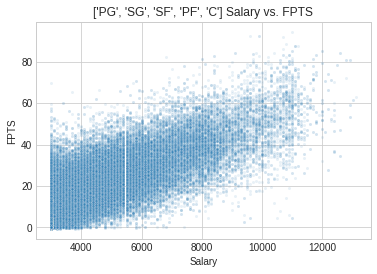

In [ ]:
visualize(df2, 'Salary', 'FPTS', positions=['PG','SG', 'SF', 'PF', 'C'], output=True)

Filtering down to positions: ['SG']
After filtering positions: (15057, 27)


,Date,Name,Team,Starter,Position,Salary,FPTS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,+-
6,20191022,Avery Bradley,LAL,1,SG,4100,11.75,24.02,3,7,...,0,3,3,0,0,0,2,3,8,-1
15,20191022,Danny Green,LAL,1,SG,5300,46.25,32.20,10,14,...,1,6,7,0,2,1,0,3,28,7
26,20191022,ETwaun Moore,Nor,0,SG,3600,12.25,12.06,2,7,...,1,2,3,2,0,0,0,0,5,-1
30,20191022,Frank Jackson,Nor,0,SG,3300,10.50,13.51,3,6,...,0,0,0,1,0,0,1,3,9,7
37,20191022,JJ Redick,Nor,1,SG,4900,20.50,27.03,6,9,...,0,2,2,1,0,0,3,3,16,-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155365,20210701,Elijah Bryant,Mil,0,SG,3000,0.00,0.38,0,0,...,0,0,0,0,0,0,0,0,0,-2
155376,20210701,Jrue Holiday,Mil,1,SG,8300,56.00,41.55,9,20,...,2,4,6,13,1,0,2,1,25,8
155381,20210701,Kevin Huerter,Atl,1,SG,5800,28.25,37.44,3,12,...,1,2,3,7,2,1,2,4,8,-12
155386,20210701,Khris Middleton,Mil,1,SG,9400,62.25,44.58,10,20,...,3,10,13,8,2,1,1,2,26,16


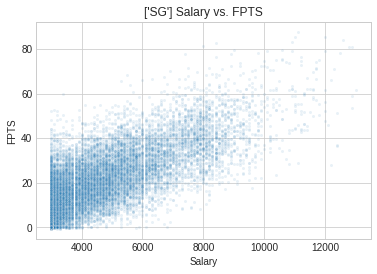

In [ ]:
visualize(df2, 'Salary', 'FPTS', positions=['SG'])


Filtering down to positions: ['SF']
After filtering positions: (15019, 27)


,Date,Name,Team,Starter,Position,Salary,FPTS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,+-
10,20191022,Brandon Ingram,Nor,1,SF,5800,41.75,35.06,8,19,...,0,5,5,5,1,2,2,4,22,-19
14,20191022,Danny Green,LAL,1,SF,5300,46.25,32.20,10,14,...,1,6,7,0,2,1,0,3,28,7
25,20191022,ETwaun Moore,Nor,0,SF,3600,12.25,12.06,2,7,...,1,2,3,2,0,0,0,0,5,-1
36,20191022,JJ Redick,Nor,1,SF,4900,20.50,27.03,6,9,...,0,2,2,1,0,0,3,3,16,-14
41,20191022,JaMychal Green,LAC,0,SF,3800,21.00,19.16,4,8,...,1,5,6,0,0,0,1,3,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155385,20210701,Khris Middleton,Mil,1,SF,9400,62.25,44.58,10,20,...,3,10,13,8,2,1,1,2,26,16
155391,20210701,Kris Dunn,Atl,0,SF,3000,3.75,7.38,0,1,...,0,1,1,1,1,0,2,3,0,6
155401,20210701,PJ Tucker,Mil,1,SF,3900,21.75,37.40,2,5,...,2,9,11,1,1,0,2,3,5,14
155405,20210701,Pat Connaughton,Mil,0,SF,3800,12.75,21.08,3,7,...,0,1,1,0,1,0,0,4,9,-2


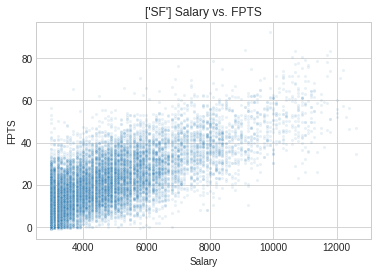

In [ ]:
visualize(df2, 'Salary', 'FPTS', positions=['SF'])

Filtering down to positions: ['PF']
After filtering positions: (13400, 27)


,Date,Name,Team,Starter,Position,Salary,FPTS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,+-
2,20191022,Anthony Davis,LAL,1,PF,10200,51.00,37.22,8,21,...,3,6,9,5,1,2,3,3,25,3
9,20191022,Brandon Ingram,Nor,1,PF,5800,41.75,35.06,8,19,...,0,5,5,5,1,2,2,4,22,-19
19,20191022,Derrick Favors,Nor,1,PF,5600,19.25,20.46,3,6,...,1,6,7,2,0,1,1,5,6,-12
40,20191022,JaMychal Green,LAC,0,PF,3800,21.00,19.16,4,8,...,1,5,6,0,0,0,1,3,12,5
48,20191022,Jared Dudley,LAL,0,PF,3100,7.00,13.21,2,2,...,0,0,0,0,0,0,0,2,6,-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155372,20210701,John Collins,Atl,1,PF,6700,35.00,34.08,7,16,...,3,5,8,3,0,0,0,3,19,-16
155395,20210701,Nathan Knight,Atl,0,PF,3000,0.00,0.52,0,0,...,0,0,0,0,0,0,0,0,0,2
155400,20210701,PJ Tucker,Mil,1,PF,3900,21.75,37.40,2,5,...,2,9,11,1,1,0,2,3,5,14
155412,20210701,Solomon Hill,Atl,0,PF,3000,0.00,1.05,0,1,...,0,0,0,0,0,0,0,0,0,2


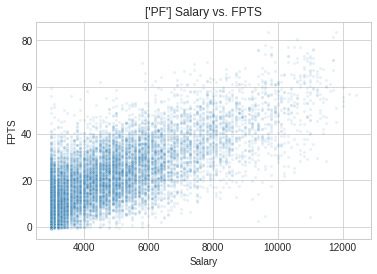

In [ ]:
visualize(df2, 'Salary', 'FPTS', positions=['PF'])

Filtering down to positions: ['C']
After filtering positions: (11930, 27)


,Date,Name,Team,Starter,Position,Salary,FPTS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,+-
0,20191022,Anthony Davis,LAL,1,C,10200,51.00,37.22,8,21,...,3,6,9,5,1,2,3,3,25,3
17,20191022,Derrick Favors,Nor,1,C,5600,19.25,20.46,3,6,...,1,6,7,2,0,1,1,5,6,-12
21,20191022,Dwight Howard,LAL,0,C,4500,14.00,19.02,1,3,...,3,3,6,1,0,1,0,4,3,-1
32,20191022,Ivica Zubac,LAC,1,C,4700,9.25,9.38,4,4,...,1,0,1,0,0,0,0,2,8,-5
43,20191022,JaVale McGee,LAL,1,C,4800,10.00,17.20,2,3,...,1,1,2,0,0,2,1,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155348,20210701,Bruno Fernando,Atl,0,C,3000,0.00,0.52,0,0,...,0,0,0,0,0,0,0,0,0,2
155359,20210701,Clint Capela,Atl,1,C,6300,23.00,21.08,2,3,...,4,4,8,1,0,3,1,2,6,-11
155370,20210701,John Collins,Atl,1,C,6700,35.00,34.08,7,16,...,3,5,8,3,0,0,0,3,19,-16
155393,20210701,Nathan Knight,Atl,0,C,3000,0.00,0.52,0,0,...,0,0,0,0,0,0,0,0,0,2


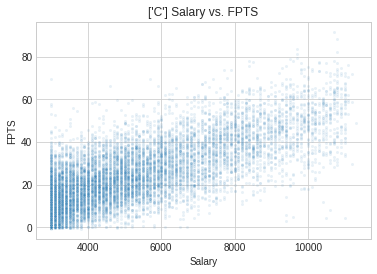

In [ ]:
visualize(df2, 'Salary', 'FPTS', positions=['C'])

Filtering down to positions: ['UTIL']
After filtering positions: (43482, 27)


,Date,Name,Team,Starter,Position,Salary,FPTS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,+-
3,20191022,Anthony Davis,LAL,1,UTIL,10200,51.00,37.22,8,21,...,3,6,9,5,1,2,3,3,25,3
7,20191022,Avery Bradley,LAL,1,UTIL,4100,11.75,24.02,3,7,...,0,3,3,0,0,0,2,3,8,-1
11,20191022,Brandon Ingram,Nor,1,UTIL,5800,41.75,35.06,8,19,...,0,5,5,5,1,2,2,4,22,-19
16,20191022,Danny Green,LAL,1,UTIL,5300,46.25,32.20,10,14,...,1,6,7,0,2,1,0,3,28,7
20,20191022,Derrick Favors,Nor,1,UTIL,5600,19.25,20.46,3,6,...,1,6,7,2,0,1,1,5,6,-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155402,20210701,PJ Tucker,Mil,1,UTIL,3900,21.75,37.40,2,5,...,2,9,11,1,1,0,2,3,5,14
155407,20210701,Pat Connaughton,Mil,0,UTIL,3800,12.75,21.08,3,7,...,0,1,1,0,1,0,0,4,9,-2
155410,20210701,Skylar Mays,Atl,0,UTIL,3000,2.00,0.52,1,1,...,0,0,0,0,0,0,0,0,2,2
155414,20210701,Solomon Hill,Atl,0,UTIL,3000,0.00,1.05,0,1,...,0,0,0,0,0,0,0,0,0,2


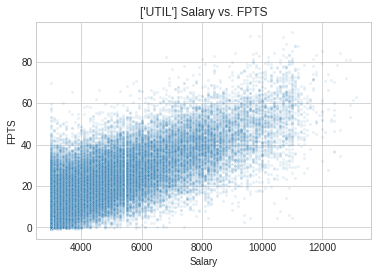

In [ ]:
visualize(df2, 'Salary', 'FPTS', positions=['UTIL'])